In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats # ANOVA

URL = 'https://raw.githubusercontent.com/amoral1/Electronics-customer-behavior/main/Electronic_sales_Sep2023-Sep2024.csv'
electronics = pd.read_csv(URL)
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

*The first 10 rows of the dataframe:*



In [10]:
electronics.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [5]:
electronics.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


*Descriptive statistics*

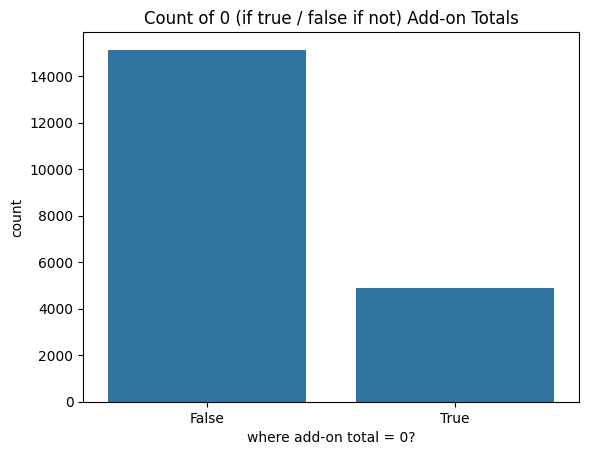

In [5]:
ax = sns.countplot(data=electronics, x=electronics['Add-on Total'].eq(0))
plt.title('Count of 0 (if true / false if not) Add-on Totals')
plt.xlabel('where add-on total = 0?')
plt.show()

*Bar chart counting how many customers did/did not purchase additional products outside of the their electronic items totals.*

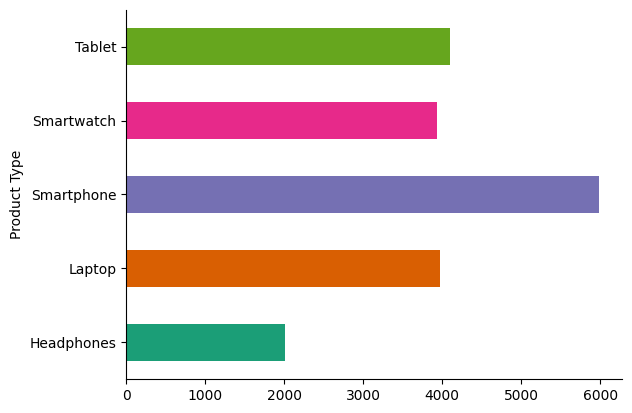

In [12]:
# @title Product Type

from matplotlib import pyplot as plt
import seaborn as sns
electronics.groupby('Product Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## In 2024, does age have any bearing on how much a customer spends on electronics?

Plotting the dependent variable

<ipython-input-16-e160d0d4f8ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(electronics['Total Price'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

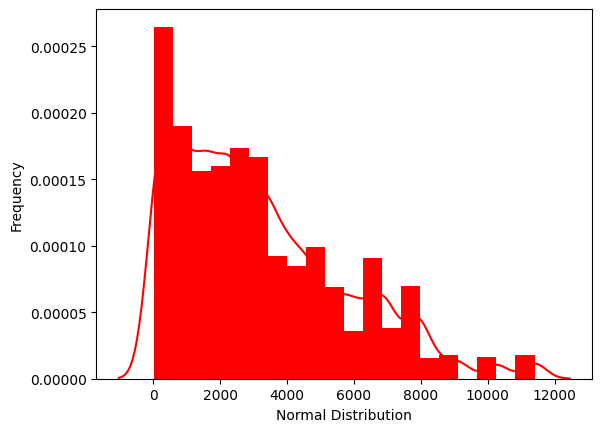

In [16]:
ax = sns.distplot(electronics['Total Price'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

*Normal Distribution of Total Prices (Skewed Right).*


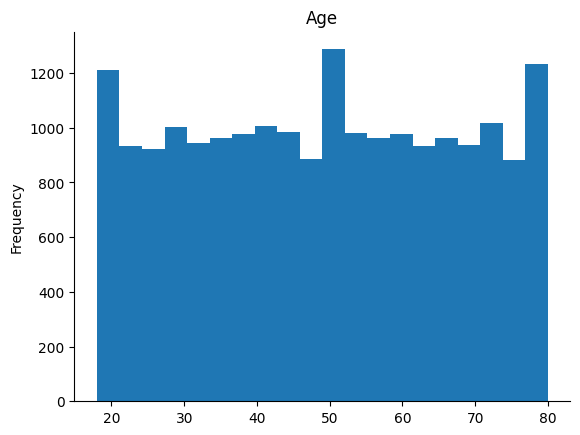

In [11]:
# @title Age

from matplotlib import pyplot as plt
electronics['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

*Histogram of 'Age' variable*

State the hypothesis:

𝐻0:𝜇_1 = 𝜇_2 ( "Age doesn't bear on how much a costumer spends on electronics" )


𝐻𝑎:𝜇_1 ≠ 𝜇_2 ( "Age does have bearing on how much a costumer spends on electronics" )

(α = 0.05)


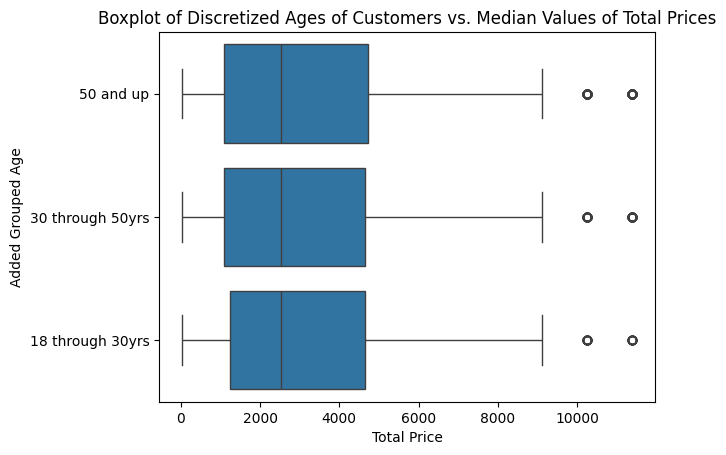

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

In [18]:
# Ages are 18-80

electronics.loc[(electronics['Age'] < 30), 'Added Grouped Age'] = '18 through 30yrs'
electronics.loc[(electronics['Age'] >= 30) & (electronics['Age'] < 50), 'Added Grouped Age'] = '30 through 50yrs'
electronics.loc[(electronics['Age'] >= 50), 'Added Grouped Age'] = '50 and up'

bxplt = sns.boxplot(x="Total Price", y="Added Grouped Age", data=electronics)
plt.title("Boxplot of Discretized Ages of Customers vs. Median Values of Total Prices")
plt.show()

scipy.stats.levene(electronics[electronics['Added Grouped Age'] == '48 through 30yrs']['Total Price'],
                   electronics[electronics['Added Grouped Age'] == '30 through 50yrs']['Total Price'],
                   electronics[electronics['Added Grouped Age'] == '50 and up']['Total Price'],
                   center='mean')
